### Contexto informe

Contexto análitico: Se trata de un conjunto de datos transnacionales que contiene todas las transacciones que se produjeron entre el 12/01/2010 y el 12/09/2011 para una tienda minorista en línea registrada y con sede en el Reino Unido. La empresa vende principalmente regalos únicos para toda ocasión. Muchos clientes de la empresa son mayoristas. Las transacciones están agrupadas a nivel de boleta, cada boleta tiene distintos productos, con descripcón, cantidad comprada, fecha de compra, el precio por unidad, el cliente y el pais donde fue comprado.

Contexto comercial: el quiebre de stock, la rotación de productos y los skus inmovilizados son indicadores claves para gestionar el inventario de una tienda. Si estos indicadores no son los óptimos, la empresa puede perder ventas ponteciales y por lo tanto dejar de percibir ingresos. Además, estar sobre stockeado en productos que no tienen rotación, genera que los skus estén inmovilizados y es dinero que podría estar invertido de otra forma generando más rentabilidad (costo de oportunidad). Dado la anterior, es importante entender la demanda por productos para poder realizar una buena gestión de inventarios.

Problema comercial: El cuando comprar y cuanto comprar son 2 problemas claves para las empresas de retail, ya que el costo de bodegaje, transporte y de oportundidad es elevado y genera pérdida por merma, costos logísticos y perdida potencial de venta. Por lo tanto, es necesario analizar que variables influyen en la demanda de los consumidores y predecir cuanto comprar y en que momento para minimizar los costos lógisticos y maximizar la venta, es decir, maximizar la utilidad.

Objetivo: Analizar los datos y encontrar información relevante para luego predecir en que momento y cuanto comprar con algoritmos que permitan estimar la demanda futura.

Hipótesis:
1.- La demanda de los meses anteriores es la variable más significativa para predecir la demanda futura
2.- Dentro de la demanda existe estacionalidad, es decir que los productos tienene más demanda dependiendo del periodo de tiempo que se esté analizado.
3.- Los productos de mayor valor son los que menos rotan (tienen menos venta respecto a su costo) y los de menor valor los que más rotan
4.- Los clientes compran productos similares a lo largo del tiempo (Cliente recurrente compra los mismos productos)

Variables:
- RowNumber: Número de filas del conjunto de datos
- InvoiceNo: identificador único de la boleta/factura de la venta realizada
- StockCode: Identificador único de los productos
- Description: descripción de cada producto
- Quantity: Cantidad vendida del producto
- InvociceDate: Fecha en que se generó la boleta/venta
- UnitPrice: precio del producto vendido
- CustomerID: identificador único de los clientes
- Country: País donde fue generada la venta

In [34]:
import numpy as np 
import pandas as pd 
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.cluster import KMeans

In [35]:
data=pd.read_csv('data.csv',encoding= 'unicode_escape')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.00,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.00,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.00,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.00,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.00,United Kingdom


### Informacion sobre los datos

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Estadísticas sobre los datos

In [37]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [45]:
df_invoice = data
df_invoice = df_invoice[df_invoice['InvoiceNo'].str.startswith('C')]
delete_this_invoice = df_invoice['InvoiceNo'].tolist
delete_this_invoice 

<bound method IndexOpsMixin.tolist of 141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 9288, dtype: object>

In [47]:
delete_this_invoice

<bound method IndexOpsMixin.tolist of 141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 9288, dtype: object>

### Devoluciones de productos 
Los datos negativos son devoluciones de productos y se identifican a través de la letra "C" en el comienzo del código de la columna "InvoiceNo". Estos valores afectan a cualquier tipo de análisis acumulado que se quiera realizar, por lo que asumiendo que tienen una causa y no afectan, se decide eliminarlos. 

In [39]:
cancelled = pd.Series(np.where(data.InvoiceNo.apply(lambda x: x[0]=="C"), 'Canceled', 'Not Canceled'))

fig = px.pie(values=cancelled.value_counts(), names=cancelled.value_counts().index, title='Orders Cancelation')
fig.show()



Pero previo a realizarlo, se analizará si existen otros outliers y si es razonable eliminarlos.

<Axes: >

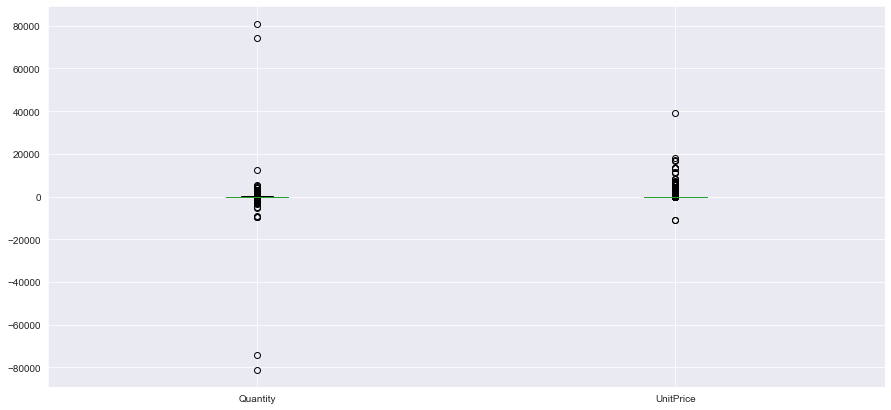

In [40]:
data[['Quantity','UnitPrice']].boxplot(figsize=(15,7))

Es posible visualizar que existen outlier cuanto a cantidad como a precio por unidad. En la cantidad, se ve que los valores negativos con los positivos se cancelan, por lo que es posible pensar en que fue una venta mal digitada y posteriorme se canceló con una venta negativa por la misma cantidad. Además existe un precio que alcanza los $40.000 y se escapa mucho de la concentración de precios, por lo que se eliminará junto con el precio negativo.

In [41]:
def remove_outliers(column):
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    IQR = Q3 - Q1
    column = column[((Q1 - 1.5 * IQR) <= column) & (column  <= (Q3 + 1.5 * IQR))]
    return column

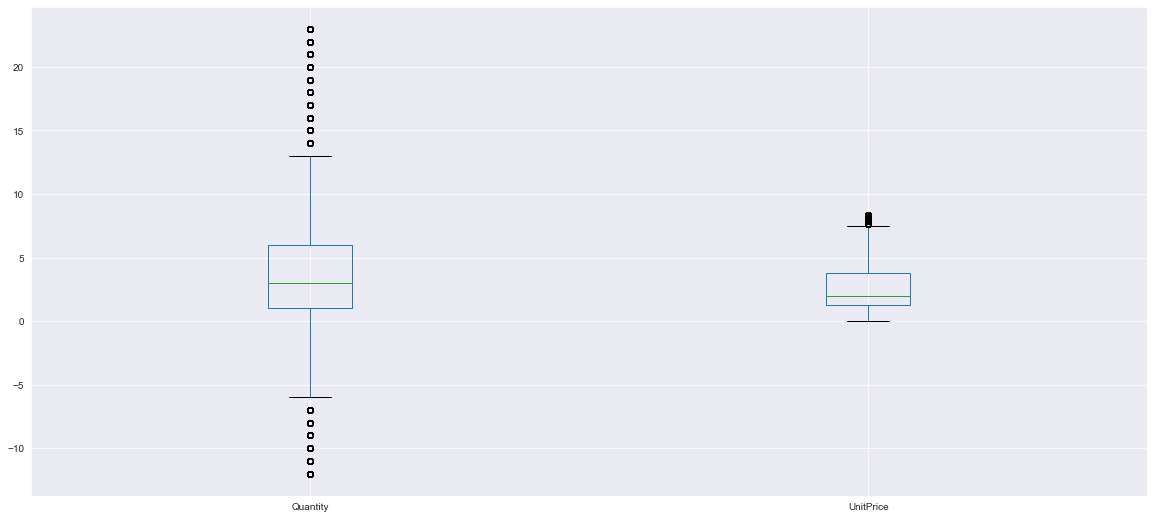

In [42]:
data.Quantity = remove_outliers(data.Quantity)
data.UnitPrice = remove_outliers(data.UnitPrice)
data[['Quantity','UnitPrice']].boxplot(figsize=(20,9));



In [ ]:
df_Datos.isnull().sum()

In [ ]:
df_Datos.info()


# Cantidad de compras:25900

In [ ]:
df_Datos.InvoiceNo.value_counts()

# Cantidad de clientes: 4372, Total de compras hechas por clientes

In [ ]:
df_Datos.CustomerID.value_counts()

# Cantidad de productos: 4070 ; cantidad total vendida de cada producto(falta multiplicar por la cantidad)

In [ ]:
df_Datos.StockCode.value_counts()

# 50 productos mas vendidos

In [ ]:
df_Datos.StockCode.value_counts().head(50)

# Cantidad de compras hechas por pais

In [ ]:
df_Datos.Country.value_counts()

In [ ]:
df2 = df_Datos[df_Datos['Country'].isin(['United Kingdom'])]
df2

In [ ]:
df_Datos['InvoiceDate'] = pd.to_datetime(df_Datos['InvoiceDate'])

In [ ]:
df_Datos['año'] = df_Datos['InvoiceDate'].dt.year
df_Datos['mes'] = df_Datos['InvoiceDate'].dt.month
df_Datos['dia'] = df_Datos['InvoiceDate'].dt.day

In [ ]:
df_Datos

In [ ]:
Productos_unicos = df_Datos['StockCode'].unique()

In [ ]:
df3 = df_Datos[df_Datos['StockCode'].isin(['85123A'])]
df3

In [ ]:
Total_85123A = df3['Quantity'].sum()
Total_85123A

In [ ]:
for i in range(len(productos_unicos)):
    productos_unicos[i] = df_Datos
    
    
    
    for nombre, grupo in df_Datos.groupby(['StockCode	', 'Quantity']):
    ventas_totales = grupo['ventas'].sum()
    print(f'{nombre}: {ventas_totales}')

In [ ]:
Por_mes_85123A = df3.groupby(['mes'])['Quantity'].sum().reset_index().sort_values(by='mes', ascending = True)
Por_mes_85123A


In [ ]:
Orden = [12,1,2,3,4,5,6,7,8,9,10,11]
Por_mes_85123A['Orden'] = Orden
Por_mes_85123A

In [ ]:
PM_Por_mes_85123A = Por_mes_85123A.groupby(['Orden'])['Quantity'].sum().reset_index().sort_values(by='Orden', ascending = True)
PM_Por_mes_85123A

In [ ]:
rolling_mean1 = PM_Por_mes_85123A.rolling(window=3).mean()
print(rolling_mean1)

In [ ]:
rolling_mean = Por_mes_85123A.rolling(window=3).mean()
print(rolling_mean)

In [ ]:
Productos = df_Datos.groupby(['StockCode'])['Quantity'].count().reset_index().sort_values(by='Quantity', ascending = False)
Productos.head(10)

In [ ]:
df_Datos['Precio Total'] = df_Datos['Quantity']*df_Datos['UnitPrice']

In [ ]:
df_Datos